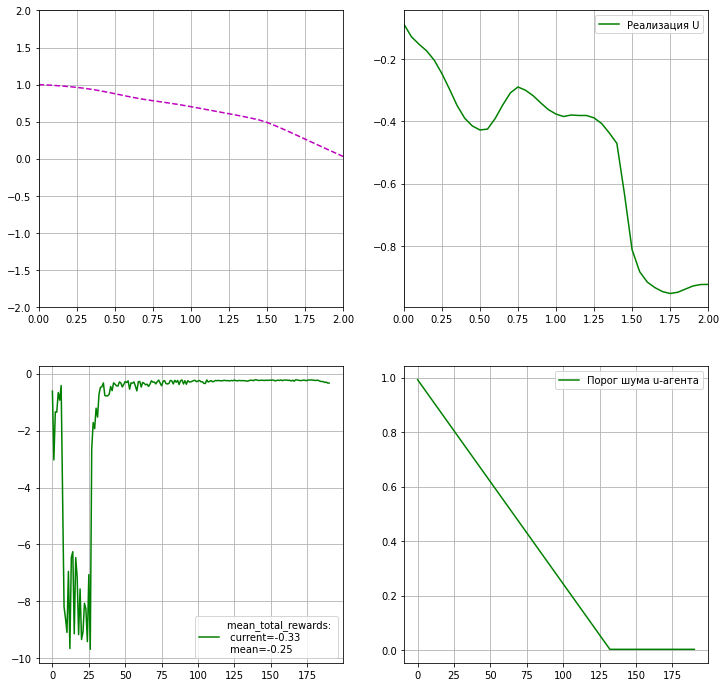

In [4]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import torch.nn as nn
from Environments.SimpleControlProblem.SimpleControlProblem import SimpleControlProblem
from Environments.SimpleControlProblem.SimpleControlProblemVisualizer import SimpleControlProblemVisualizer
from Agents.DDPG import DDPG
from Agents.Utilities.SequentialNetwork import SequentialNetwork
from Agents.Utilities.Noises import OUNoise
from Solvers import OneAgentSolver as solver 
%load_ext autoreload
%autoreload 2

#learning parameters
episode_n = 201

#environment initialization
env = SimpleControlProblem()

#agent initialization
q_model = SequentialNetwork([env.state_dim + env.action_dim, 256, 128, 1])
pi_model = SequentialNetwork([env.state_dim, 256, 128, env.action_dim], output_activation=nn.Tanh())
noise = OUNoise(action_dim=env.action_dim, threshold_decrease=1.5/episode_n)
agent = DDPG(env.action_min, env.action_max, q_model, pi_model, noise,
             q_model_lr=1e-3, pi_model_lr=1e-3, gamma=1, batch_size=256, tau=1e-2)

#learning
visualizer = SimpleControlProblemVisualizer(waiting_for_show=10)
solver.go(env, agent, episode_n=episode_n, show=visualizer.show)